# Results Analysis

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "combinedOutput_cleaned.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99993 entries, 0 to 99992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   originalSentence     99993 non-null  object 
 1   referenceSentence    99993 non-null  object 
 2   tamperingType        99993 non-null  object 
 3   tamperedSentence     99993 non-null  object 
 4   LLMScore (Sim, Con)  99993 non-null  object 
 5   BLEU                 99993 non-null  float64
 6   METEOR               99993 non-null  float64
 7   Rouge1 r             99993 non-null  float64
 8   Rouge1 p             99993 non-null  float64
 9   Rouge1 f             99993 non-null  float64
 10  Rouge2 r             99993 non-null  float64
 11  Rouge2 p             99993 non-null  float64
 12  Rouge2 f             99993 non-null  float64
 13  Rougel r             99993 non-null  float64
 14  Rougel p             99993 non-null  float64
 15  Rougel f             99993 non-null 

In [4]:
df["LLM-Con"].unique()

array([1.  , 0.99, 0.95, 0.9 , 0.85, 0.98, 0.8 , 0.75])

In [5]:
df["LLM-Sim"].unique()

array([1.  , 0.99, 0.95, 0.85, 0.98, 0.75, 0.9 , 0.2 , 0.05, 0.6 , 0.  ,
       0.25, 0.1 , 0.97, 0.65, 0.8 , 0.5 , 0.92, 0.7 , 0.3 , 0.93, 0.15,
       0.01, 0.4 , 0.02, 0.55])

In [6]:
file_path = "daOutput_cleaned.csv"
df_da = pandas.read_csv(file_path, encoding='utf-8')
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           49995 non-null  int64  
 1   originalSentence     49995 non-null  object 
 2   referenceSentence    49995 non-null  object 
 3   tamperingType        49995 non-null  object 
 4   tamperedSentence     49995 non-null  object 
 5   LLMScore (Sim, Con)  49995 non-null  object 
 6   BLEU                 49995 non-null  float64
 7   METEOR               49995 non-null  float64
 8   Rouge1 r             49995 non-null  float64
 9   Rouge1 p             49995 non-null  float64
 10  Rouge1 f             49995 non-null  float64
 11  Rouge2 r             49995 non-null  float64
 12  Rouge2 p             49995 non-null  float64
 13  Rouge2 f             49995 non-null  float64
 14  Rougel r             49995 non-null  float64
 15  Rougel p             49995 non-null 

In [7]:
df_da["originalLanguage"].unique()

array(['da'], dtype=object)

In [8]:
file_path = "enOutput_cleaned.csv"
df_en = pandas.read_csv(file_path, encoding='utf-8')
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           49998 non-null  int64  
 1   originalSentence     49998 non-null  object 
 2   referenceSentence    49998 non-null  object 
 3   tamperingType        49998 non-null  object 
 4   tamperedSentence     49998 non-null  object 
 5   LLMScore (Sim, Con)  49998 non-null  object 
 6   BLEU                 49998 non-null  float64
 7   METEOR               49998 non-null  float64
 8   Rouge1 r             49998 non-null  float64
 9   Rouge1 p             49998 non-null  float64
 10  Rouge1 f             49998 non-null  float64
 11  Rouge2 r             49998 non-null  float64
 12  Rouge2 p             49998 non-null  float64
 13  Rouge2 f             49998 non-null  float64
 14  Rougel r             49998 non-null  float64
 15  Rougel p             49998 non-null 

In [9]:
df_en["originalLanguage"].unique()

array(['en'], dtype=object)

## Results

### Combined Dataset

In [59]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']

mean_by_strategy = df.groupby("tamperingType")[columns_of_interest].mean()
mean_global = df.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy = df.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy = df.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy)
print("\nMedian by Tampering Strategy:\n", median_by_strategy)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy)

mean_values = df[columns_of_interest].mean()
median_values = df[columns_of_interest].median()
std_values = df[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values)
print("\nOverall Median:\n", median_values)
print("\nOverall Standard Deviation:\n", std_values)

z_scores = (mean_by_strategy - mean_values) / std_values
print("\nZ-scores for Tampering Strategies:\n", z_scores)

def z_bin(value):
    if value > 0.5:
        return "High"
    elif value < -0.5:
        return "Low"
    else:
        return "Medium"

z_bins = z_scores.applymap(z_bin)
print("\nZ-Score Bins (Low/Medium/High):\n", z_bins)

percentile_bins = mean_by_strategy.rank(method='first').apply(
    lambda col: pandas.qcut(col, q=[0, 0.3, 0.7, 1.0], labels=["Low", "Medium", "High"])
)

print("\nPercentile Bins (Low/Medium/High):\n", percentile_bins)

Mean by Tampering Strategy:
                                     BLEU    METEOR  Rouge1 r  Rouge1 p  \
tamperingType                                                            
Add random word                 0.858711  0.993023  0.994740  0.932252   
Duplicate Token                 0.898438  0.992915  0.998142  0.993816   
Duplicate character             0.846081  0.943644  0.936322  0.932497   
Negation                        0.855053  0.952893  0.938494  0.992762   
Remove Character                0.845796  0.944142  0.935952  0.933044   
Remove Token                    0.849991  0.946889  0.933798  0.992651   
Replace Character               0.846999  0.942639  0.936778  0.932924   
Replace Token with Random Word  0.845141  0.941992  0.937412  0.930372   
Swap characters                 0.845224  0.941914  0.935533  0.932166   
Swap words                      0.798344  0.989711  1.000000  0.946666   

                                Rouge1 f  Rouge2 r  Rouge2 p  Rouge2 f  \
tamperin

C:\Users\oskar\AppData\Local\Temp\ipykernel_24196\4266850588.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  z_bins = z_scores.applymap(z_bin)


### English Dataset

In [11]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f']

mean_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy_en)
print("\nMedian by Tampering Strategy:\n", median_by_strategy_en)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy_en)

mean_values_en = df_en[columns_of_interest].mean()
median_values_en = df_en[columns_of_interest].median()
std_values_en = df_en[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values_en)
print("\nOverall Median:\n", median_values_en)
print("\nOverall Standard Deviation:\n", std_values_en)

Mean by Tampering Strategy:
                                     BLEU    METEOR  Rouge1 r  Rouge1 p  \
tamperingType                                                            
Add random word                 0.862044  0.993256  0.995171  0.933156   
Duplicate Token                 0.900690  0.993031  0.998270  0.993886   
Duplicate character             0.851955  0.945873  0.939149  0.934497   
Negation                        0.857072  0.953430  0.939269  0.990066   
Remove Character                0.849221  0.946018  0.938490  0.934873   
Remove Token                    0.852662  0.947783  0.936501  0.992740   
Replace Character               0.851581  0.943967  0.938917  0.934230   
Replace Token with Random Word  0.850209  0.943559  0.940270  0.931453   
Swap characters                 0.849743  0.943610  0.937955  0.933808   
Swap words                      0.806856  0.990755  1.000000  0.947517   

                                Rouge1 f  Rouge2 r  Rouge2 p  Rouge2 f  \
tamperin

### Danish Dataset

In [12]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f']

mean_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy_da)
print("\nMedian by Tampering Strategy:\n", median_by_strategy_da)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy_da)

mean_values_da = df_da[columns_of_interest].mean()
median_values_da = df_da[columns_of_interest].median()
std_values_da = df_da[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values_da)
print("\nOverall Median:\n", median_values_da)
print("\nOverall Standard Deviation:\n", std_values_da)

Mean by Tampering Strategy:
                                     BLEU    METEOR  Rouge1 r  Rouge1 p  \
tamperingType                                                            
Add random word                 0.855378  0.992791  0.994309  0.931347   
Duplicate Token                 0.896185  0.992798  0.998014  0.993746   
Duplicate character             0.840207  0.941415  0.933494  0.930497   
Negation                        0.853034  0.952356  0.937718  0.995459   
Remove Character                0.842372  0.942266  0.933414  0.931216   
Remove Token                    0.847320  0.945995  0.931096  0.992563   
Replace Character               0.842418  0.941312  0.934639  0.931619   
Replace Token with Random Word  0.840071  0.940424  0.934554  0.929290   
Swap characters                 0.840705  0.940218  0.933111  0.930525   
Swap words                      0.789833  0.988667  1.000000  0.945816   

                                Rouge1 f  Rouge2 r  Rouge2 p  Rouge2 f  \
tamperin

## Plots mean and median for each metrics

### Combined Dataset

In [13]:
assert mean_by_strategy.index.to_list() == median_by_strategy.index.to_list()

In [ ]:
tampering_types = df["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values = mean_by_strategy[column].values
    median_values = median_by_strategy[column].values

    bars1 = ax.bar(x - width/2, mean_values, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - Combined Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


### English Dataset

In [15]:
assert mean_by_strategy_en.index.to_list() == median_by_strategy_en.index.to_list()

In [ ]:
tampering_types = df_en["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values_en = mean_by_strategy_en[column].values
    median_values_en = median_by_strategy_en[column].values

    bars1 = ax.bar(x - width/2, mean_values_en, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values_en, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - English Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy_en.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


### Danish Dataset

In [17]:
assert mean_by_strategy_da.index.to_list() == median_by_strategy_da.index.to_list()

In [ ]:
tampering_types = df_da["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values_da = mean_by_strategy_da[column].values
    median_values_da = median_by_strategy_da[column].values

    bars1 = ax.bar(x - width/2, mean_values_da, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values_da, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - Danish Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy_da.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


## Error bars using mean and std

In [19]:
new_labels = [
    "Random Word Addition", "Word Duplication", "Letter Duplication", "Negation Removal",
    "Letter Removal", "Word Removal", "Letter Replacement", "Word Replacement",
    "Letter Swapping", "Swap word order"
]

### Combined Dataset

In [20]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()  
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std = df.groupby("tamperingType")["BLEU"].std()
meteor_std = df.groupby("tamperingType")["METEOR"].std()
rouge_std = df.groupby("tamperingType")["Rougel f"].std()
llm_std = df.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean.index.to_list() == meteor_mean.index.to_list() == rouge_mean.index.to_list() == llm_mean.index.to_list()

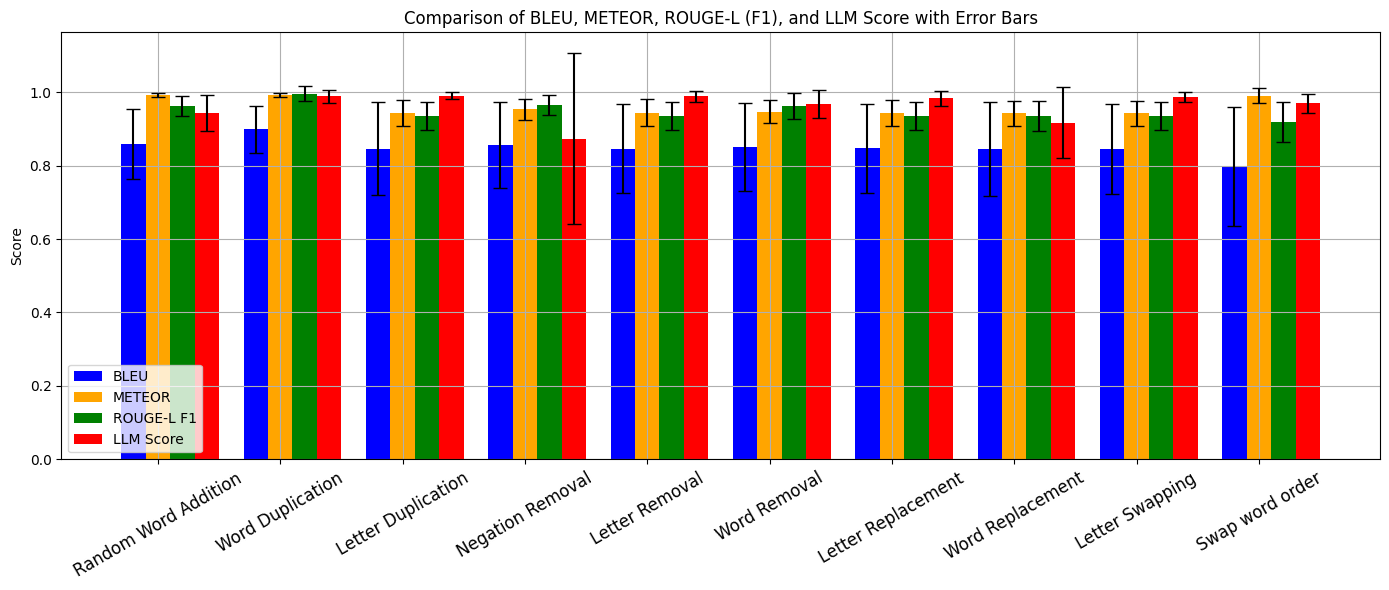

In [21]:
x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_std, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_std, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_std, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_std, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars")
ax.set_xticks(x)
ax.set_xticklabels(new_labels, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### English Dataset

In [22]:
tampering_types = df_en["tamperingType"].unique()

bleu_mean_en = df_en.groupby("tamperingType")["BLEU"].mean()
meteor_mean_en = df_en.groupby("tamperingType")["METEOR"].mean()
rouge_mean_en = df_en.groupby("tamperingType")["Rougel f"].mean()  
llm_mean_en = df_en.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std_en = df_en.groupby("tamperingType")["BLEU"].std()
meteor_std_en = df_en.groupby("tamperingType")["METEOR"].std()
rouge_std_en = df_en.groupby("tamperingType")["Rougel f"].std()
llm_std_en = df_en.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean_en.index.to_list() == meteor_mean_en.index.to_list() == rouge_mean_en.index.to_list() == llm_mean_en.index.to_list()

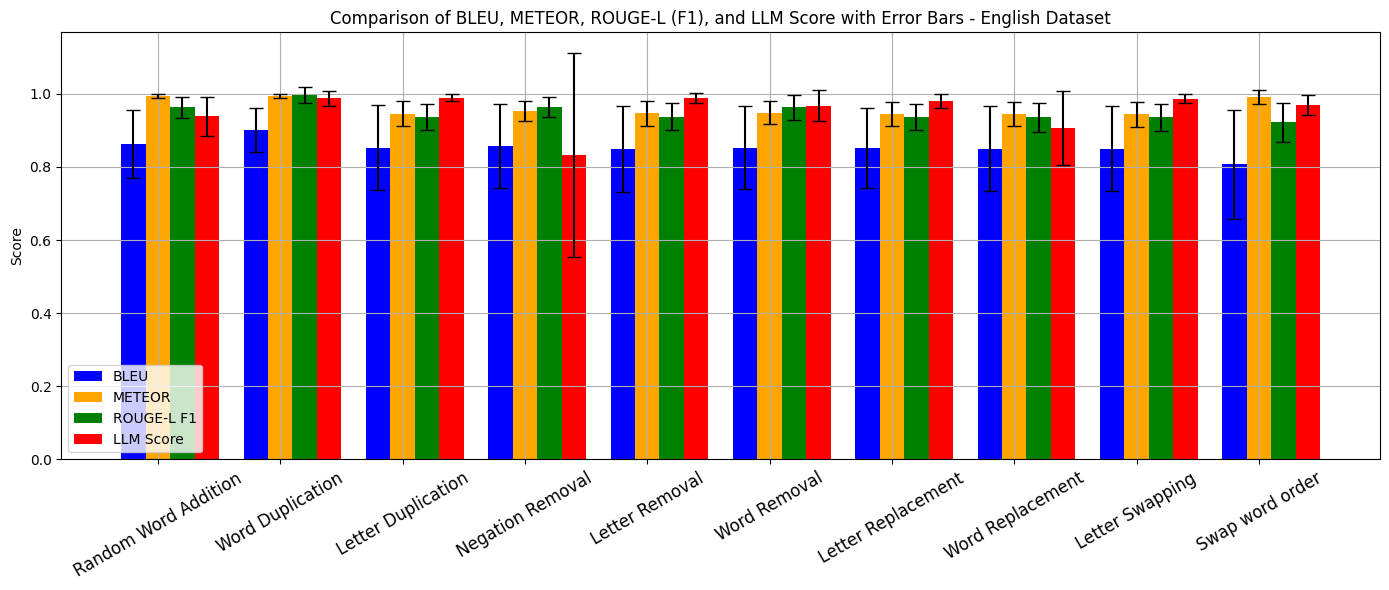

In [23]:
x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_en, width, yerr=bleu_std_en, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_en, width, yerr=meteor_std_en, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_en, width, yerr=rouge_std_en, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_en, width, yerr=llm_std_en, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars - English Dataset")
ax.set_xticks(x)
ax.set_xticklabels(new_labels, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Danish Dataset

In [24]:
tampering_types = df_da["tamperingType"].unique()

bleu_mean_da = df_da.groupby("tamperingType")["BLEU"].mean()
meteor_mean_da = df_da.groupby("tamperingType")["METEOR"].mean()
rouge_mean_da = df_da.groupby("tamperingType")["Rougel f"].mean()  
llm_mean_da = df_da.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std_da = df_da.groupby("tamperingType")["BLEU"].std()
meteor_std_da = df_da.groupby("tamperingType")["METEOR"].std()
rouge_std_da = df_da.groupby("tamperingType")["Rougel f"].std()
llm_std_da = df_da.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean_da.index.to_list() == meteor_mean_da.index.to_list() == rouge_mean_da.index.to_list() == llm_mean_da.index.to_list()

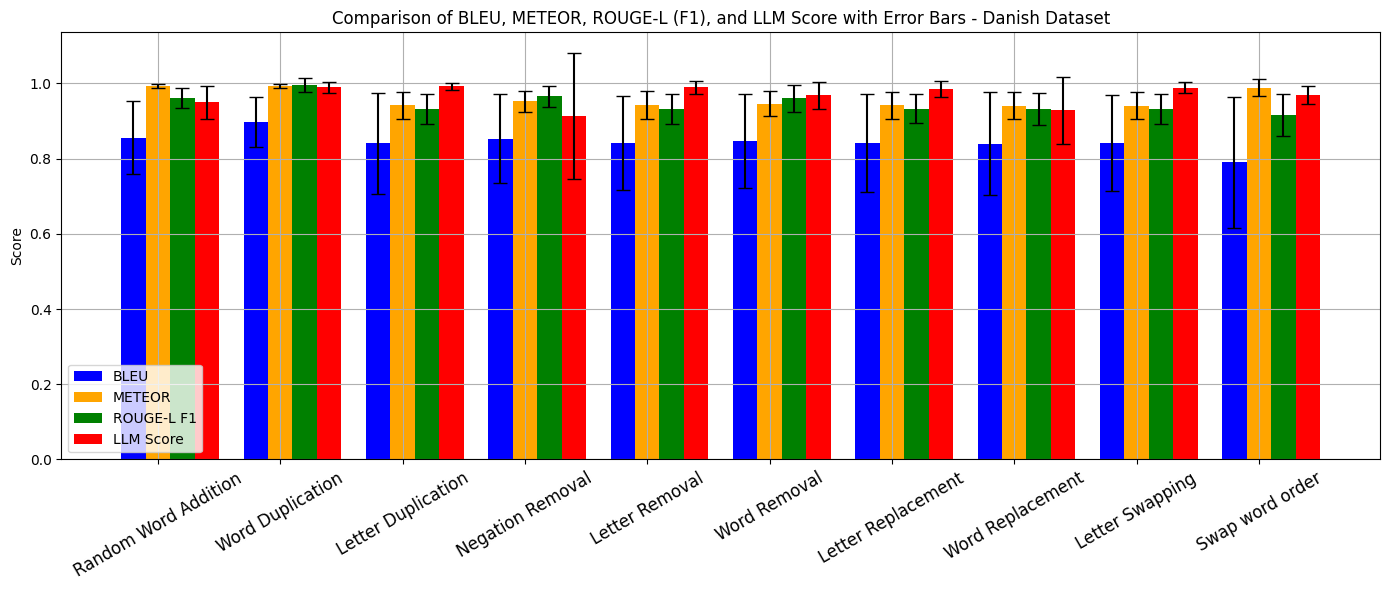

In [25]:

x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_da, width, yerr=bleu_std_da, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_da, width, yerr=meteor_std_da, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_da, width, yerr=rouge_std_da, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_da, width, yerr=llm_std_da, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars - Danish Dataset")
ax.set_xticks(x)
ax.set_xticklabels(new_labels, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


## Error bars using mean and min/max

### Combined Dataset

In [26]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min = df.groupby("tamperingType")["BLEU"].min()
bleu_max = df.groupby("tamperingType")["BLEU"].max()

meteor_min = df.groupby("tamperingType")["METEOR"].min()
meteor_max = df.groupby("tamperingType")["METEOR"].max()

rouge_min = df.groupby("tamperingType")["Rougel f"].min()
rouge_max = df.groupby("tamperingType")["Rougel f"].max()

llm_min = df.groupby("tamperingType")["LLM-Sim"].min()
llm_max = df.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean.index.to_list() == meteor_mean.index.to_list() == rouge_mean.index.to_list() == llm_mean.index.to_list()

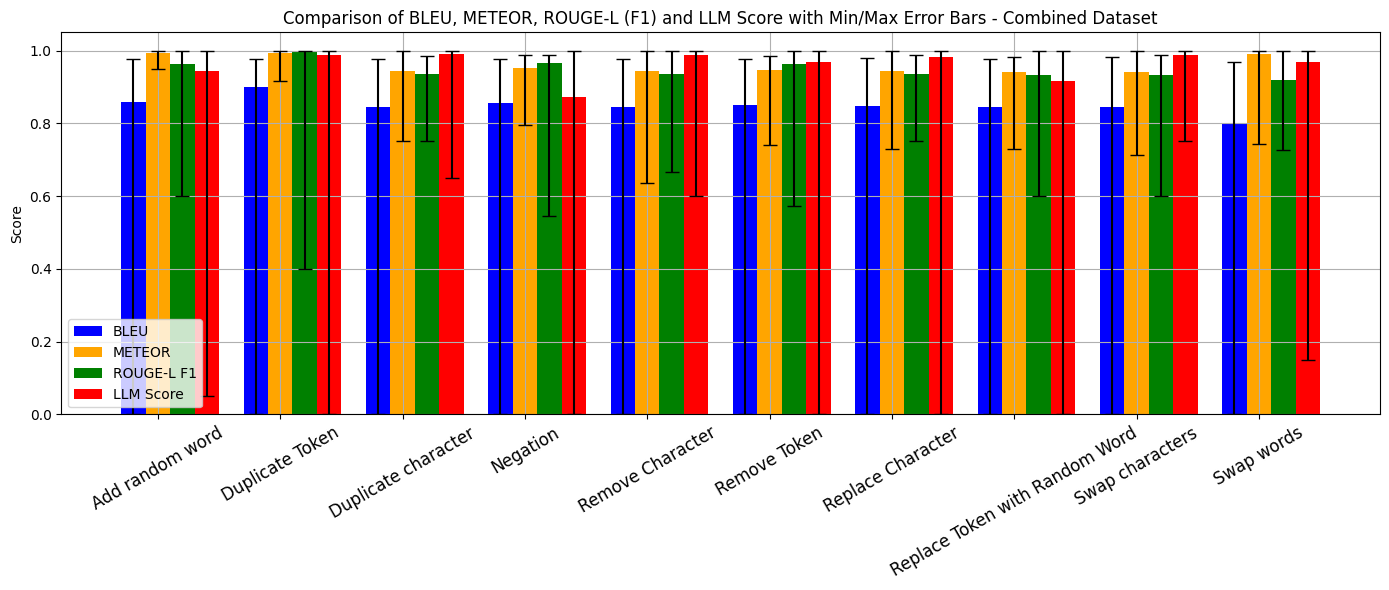

In [27]:
bleu_errors = [bleu_mean - bleu_min, bleu_max - bleu_mean]
meteor_errors = [meteor_mean - meteor_min, meteor_max - meteor_mean]
rouge_errors = [rouge_mean - rouge_min, rouge_max - rouge_mean]
llm_errors = [llm_mean - llm_min, llm_max - llm_mean]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_errors, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_errors, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_errors, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_errors, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - Combined Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### English Dataset:

In [28]:
tampering_types = df_en["tamperingType"].unique()

bleu_mean_en = df_en.groupby("tamperingType")["BLEU"].mean()
meteor_mean_en = df_en.groupby("tamperingType")["METEOR"].mean()
rouge_mean_en = df_en.groupby("tamperingType")["Rougel f"].mean()
llm_mean_en = df_en.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min_en = df_en.groupby("tamperingType")["BLEU"].min()
bleu_max_en = df_en.groupby("tamperingType")["BLEU"].max()

meteor_min_en = df_en.groupby("tamperingType")["METEOR"].min()
meteor_max_en = df_en.groupby("tamperingType")["METEOR"].max()

rouge_min_en = df_en.groupby("tamperingType")["Rougel f"].min()
rouge_max_en = df_en.groupby("tamperingType")["Rougel f"].max()

llm_min_en = df_en.groupby("tamperingType")["LLM-Sim"].min()
llm_max_en = df_en.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean_en.index.to_list() == meteor_mean_en.index.to_list() == rouge_mean_en.index.to_list() == llm_mean_en.index.to_list()

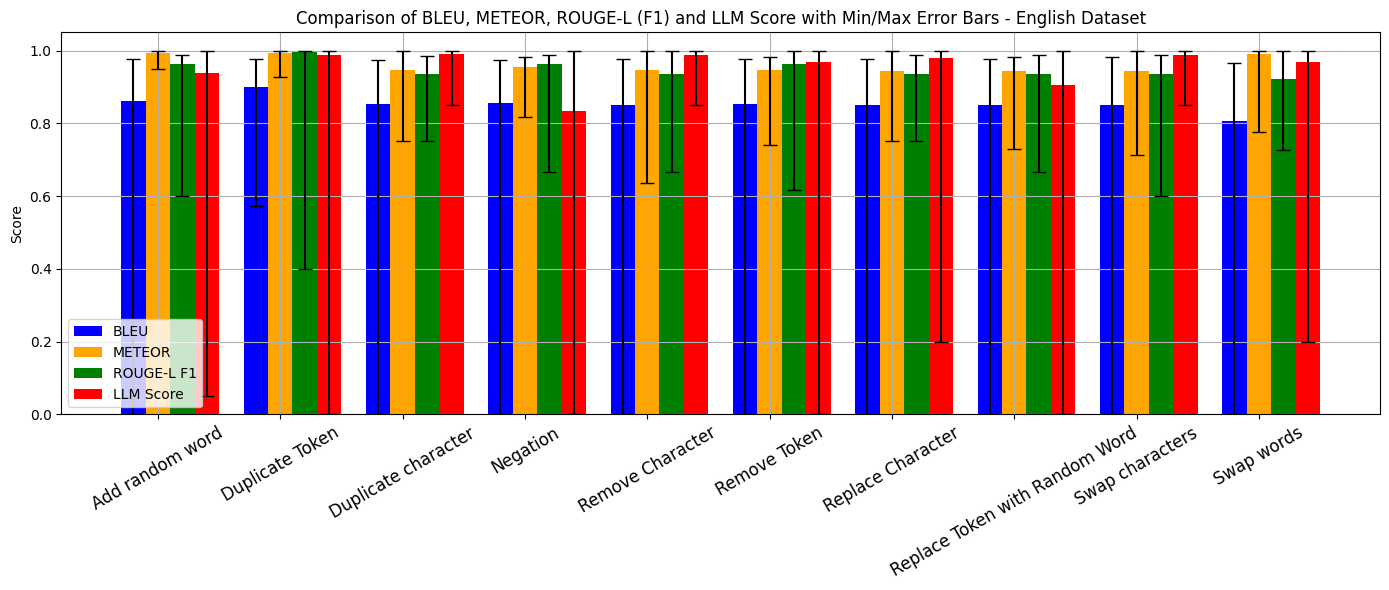

In [29]:
bleu_errors_en = [bleu_mean_en - bleu_min_en, bleu_max_en - bleu_mean_en]
meteor_errors_en = [meteor_mean_en - meteor_min_en, meteor_max_en - meteor_mean_en]
rouge_errors_en = [rouge_mean_en - rouge_min_en, rouge_max_en - rouge_mean_en]
llm_errors_en = [llm_mean_en - llm_min_en, llm_max_en - llm_mean_en]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_en, width, yerr=bleu_errors_en, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_en, width, yerr=meteor_errors_en, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_en, width, yerr=rouge_errors_en, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_en, width, yerr=llm_errors_en, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - English Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_en.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Danish Dataset

In [30]:
tampering_types = df_da["tamperingType"].unique()

bleu_mean_da = df_da.groupby("tamperingType")["BLEU"].mean()
meteor_mean_da = df_da.groupby("tamperingType")["METEOR"].mean()
rouge_mean_da = df_da.groupby("tamperingType")["Rougel f"].mean()
llm_mean_da = df_da.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min_da = df_da.groupby("tamperingType")["BLEU"].min()
bleu_max_da = df_da.groupby("tamperingType")["BLEU"].max()

meteor_min_da = df_da.groupby("tamperingType")["METEOR"].min()
meteor_max_da = df_da.groupby("tamperingType")["METEOR"].max()

rouge_min_da = df_da.groupby("tamperingType")["Rougel f"].min()
rouge_max_da = df_da.groupby("tamperingType")["Rougel f"].max()

llm_min_da = df_da.groupby("tamperingType")["LLM-Sim"].min()
llm_max_da = df_da.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean_da.index.to_list() == meteor_mean_da.index.to_list() == rouge_mean_da.index.to_list() == llm_mean_da.index.to_list()

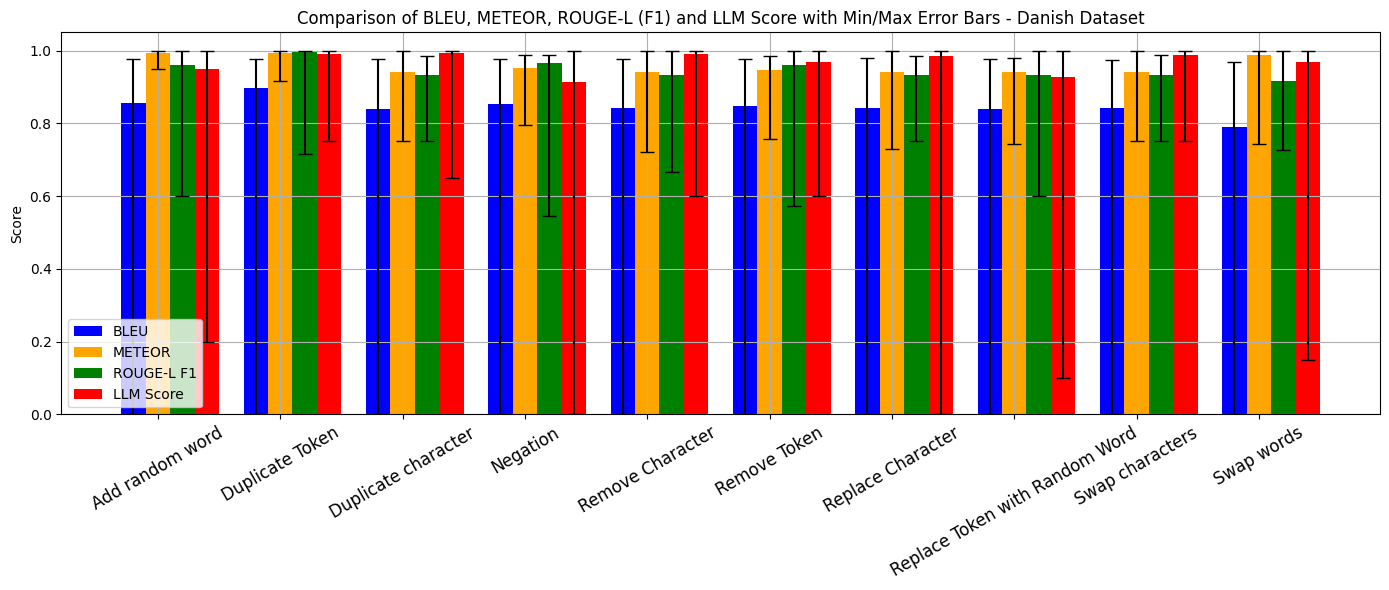

In [31]:
bleu_errors_da = [bleu_mean_da - bleu_min_da, bleu_max_da - bleu_mean_da]
meteor_errors_da = [meteor_mean_da - meteor_min_da, meteor_max_da - meteor_mean_da]
rouge_errors_da = [rouge_mean_da - rouge_min_da, rouge_max_da - rouge_mean_da]
llm_errors_da = [llm_mean_da - llm_min_da, llm_max_da - llm_mean_da]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_da, width, yerr=bleu_errors_da, capsize=5, label="BLEU", color="blue")
bars2 = ax.bar(x, meteor_mean_da, width, yerr=meteor_errors_da, capsize=5, label="METEOR", color="orange")
bars3 = ax.bar(x + width, rouge_mean_da, width, yerr=rouge_errors_da, capsize=5, label="ROUGE-L F1", color="green")
bars4 = ax.bar(x + width*2, llm_mean_da, width, yerr=llm_errors_da, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - Danish Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_da.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


In [32]:
import seaborn as sns

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html

tampering_types = df["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df[(df["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - Combined Dataset")
    

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
tampering_types = df_en["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df_en[(df_en["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - English Dataset")
    

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
tampering_types = df_da["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df_da[(df_da["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - Danish Dataset")
    

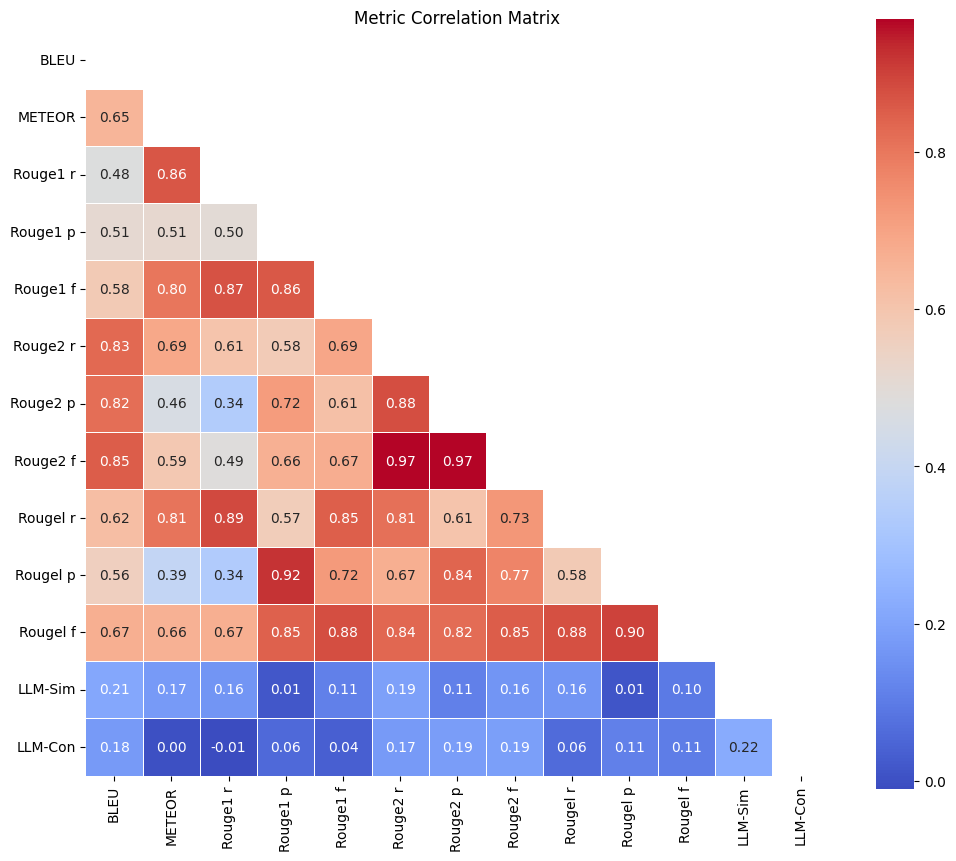

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dfMet = df[['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']]
corr = dfMet.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title('Metric Correlation Matrix')
plt.show()


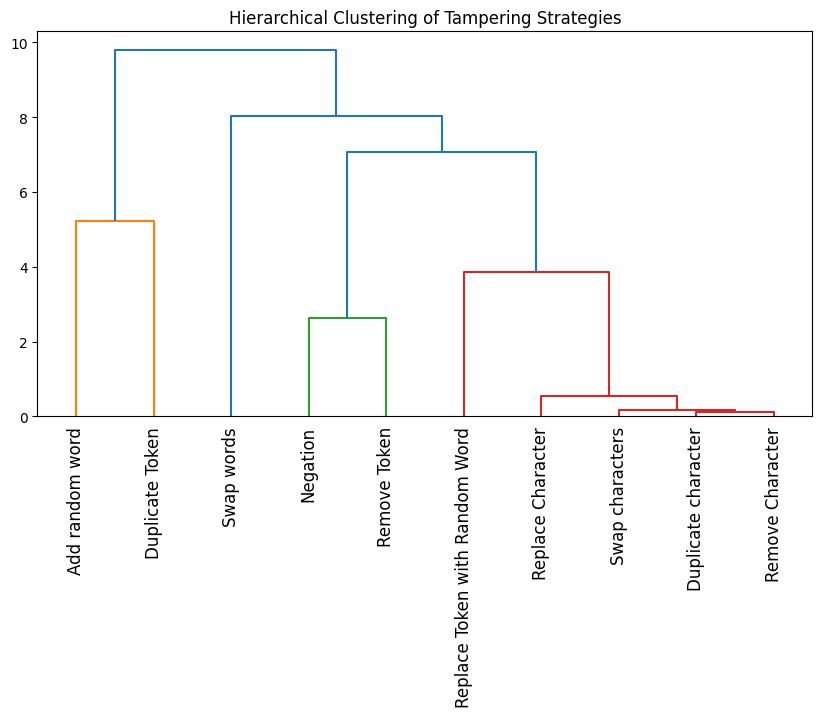

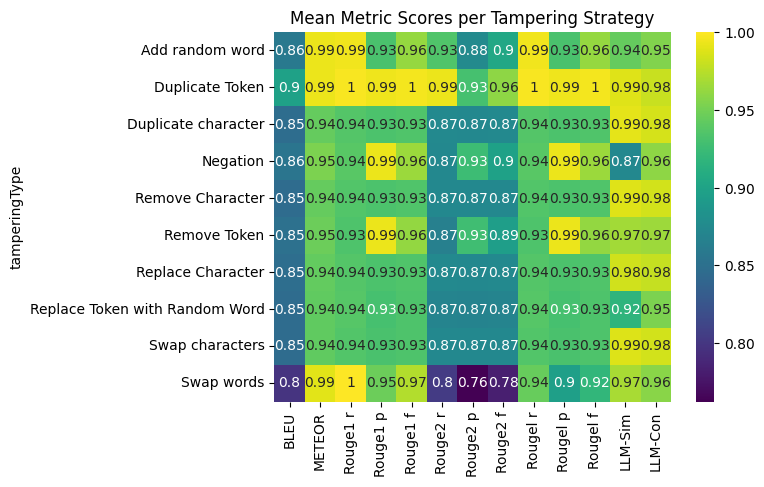

In [37]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

strategy_means = df.groupby("tamperingType").mean(numeric_only=True)
scaler = StandardScaler()
normalized = scaler.fit_transform(strategy_means)


# Create the linkage matrix and plot dendrogram
linked = linkage(normalized, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=strategy_means.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Tampering Strategies")
plt.show()

cluster_labels = fcluster(linked, t=3, criterion='maxclust')  # change `t` based on the plot
strategy_means['cluster'] = cluster_labels

sns.heatmap(strategy_means.drop("cluster", axis=1), annot=True, cmap="viridis", xticklabels=True, yticklabels=strategy_means.index)
plt.title("Mean Metric Scores per Tampering Strategy")
plt.show()



# Human Score Analysis

In [38]:
import pandas as pd

df = pd.read_csv('humanScoring.csv')

with open('Oskar') as f1, open('Nhu') as f2, open('Christina') as f3:
    nums1 = [float(line.strip()) for line in f1]
    nums2 = [float(line.strip()) for line in f2]
    nums3 = [float(line.strip()) for line in f3]

mean_values = [(a + b + c) / 3 for a, b, c in zip(nums1, nums2, nums3)]

df['humanMean'] = mean_values

df.to_csv('humanScores.csv', index=False)


In [45]:
import pandas as pd

df = pd.read_csv("humanScores.csv")
columns_to_keep = ['tamperingType', 'humanMean']
df_filtered = df[columns_to_keep]

result = df_filtered.groupby('tamperingType').mean()

print(result)



                                humanMean
tamperingType                            
Add random word                  0.552333
Duplicate Token                  0.856000
Duplicate character              0.880667
Negation                         0.201667
Remove Character                 0.620000
Remove Token                     0.644667
Replace Character                0.644333
Replace Token with Random Word   0.471667
Swap characters                  0.923667
Swap words                       0.676667


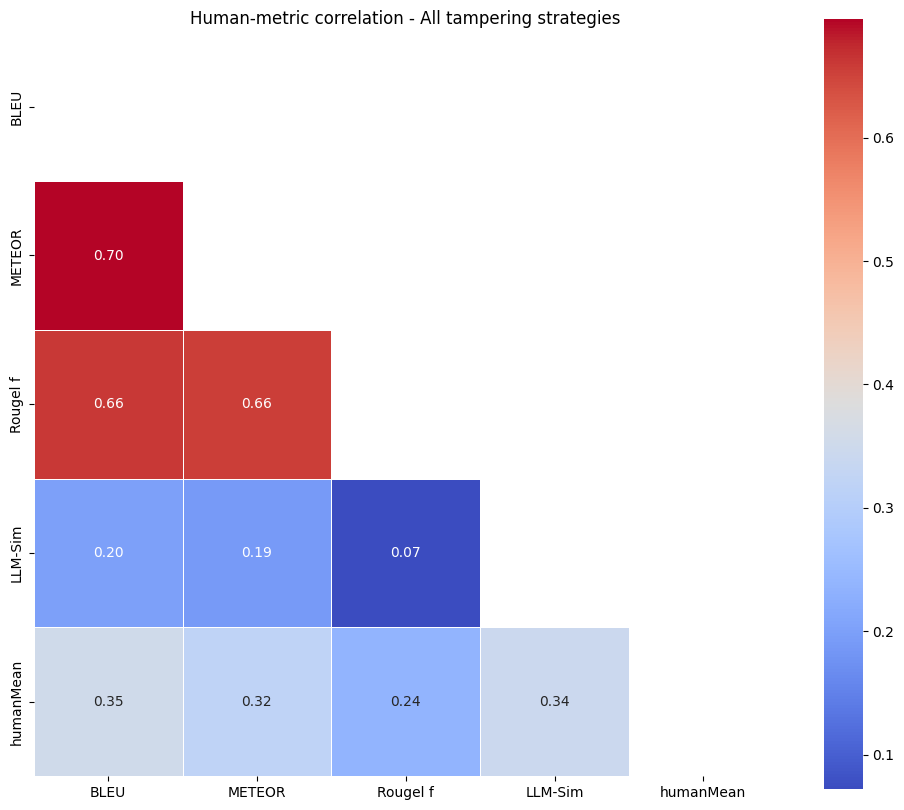

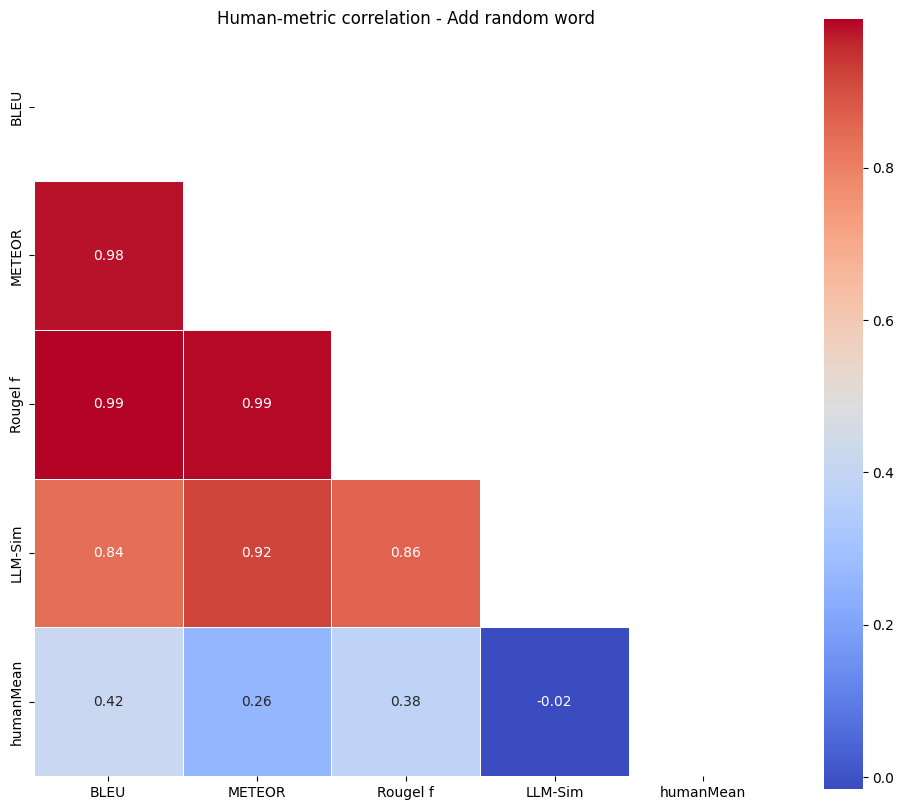

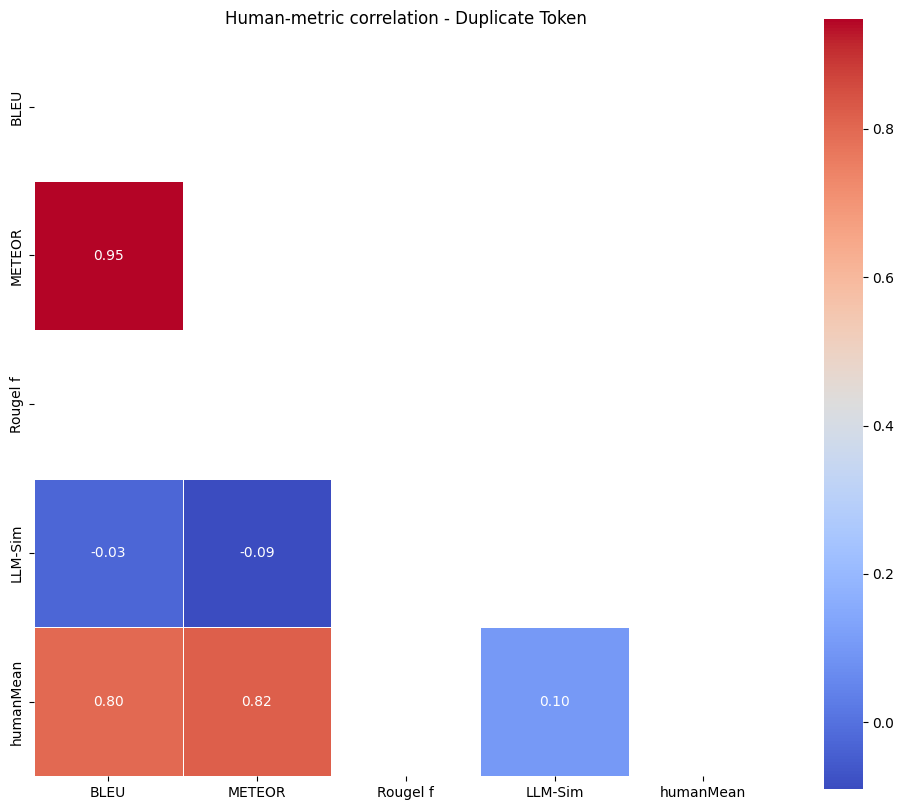

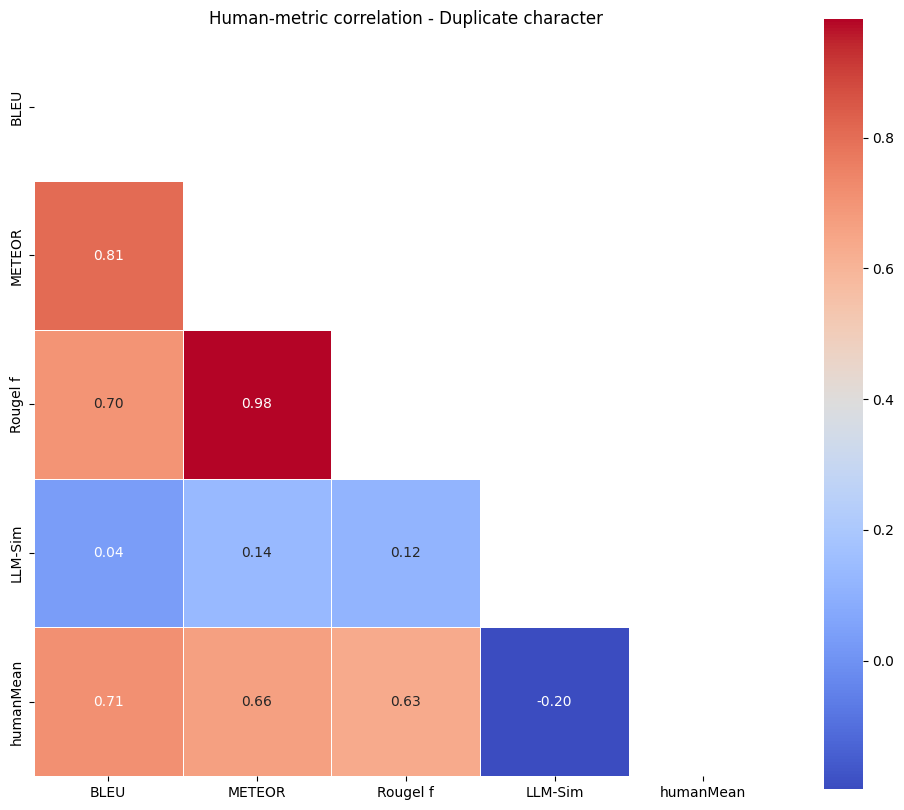

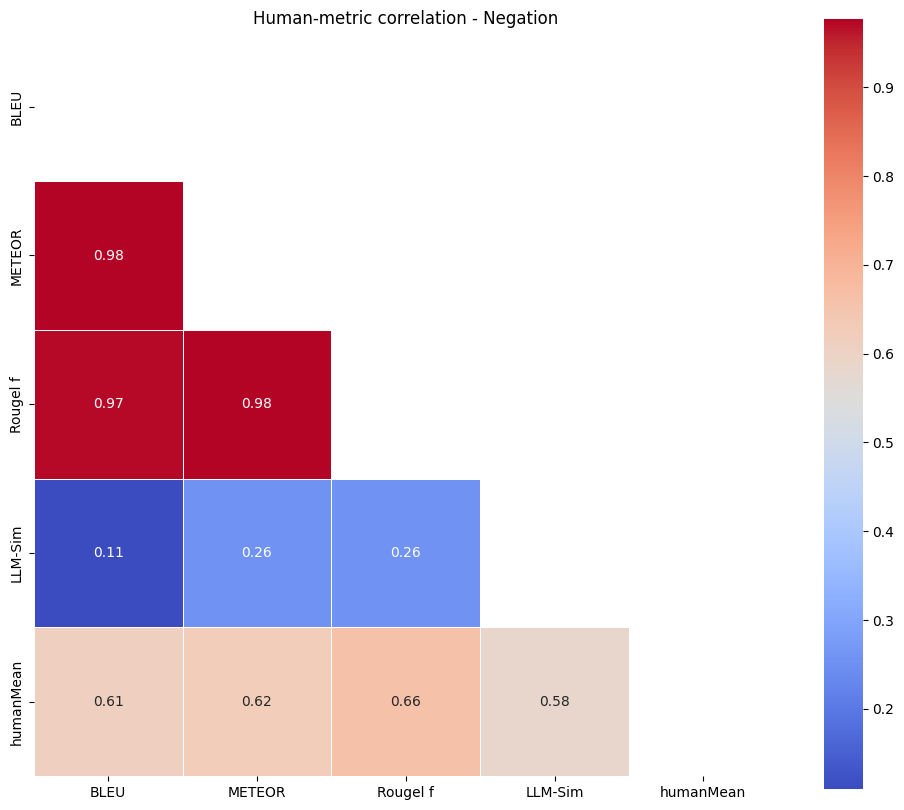

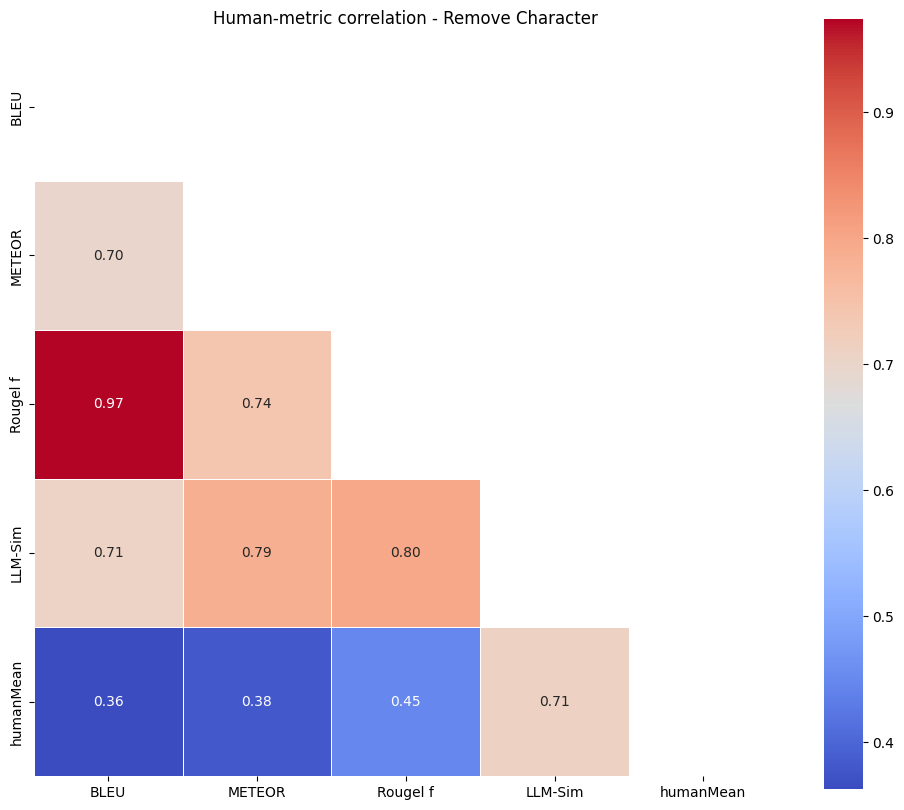

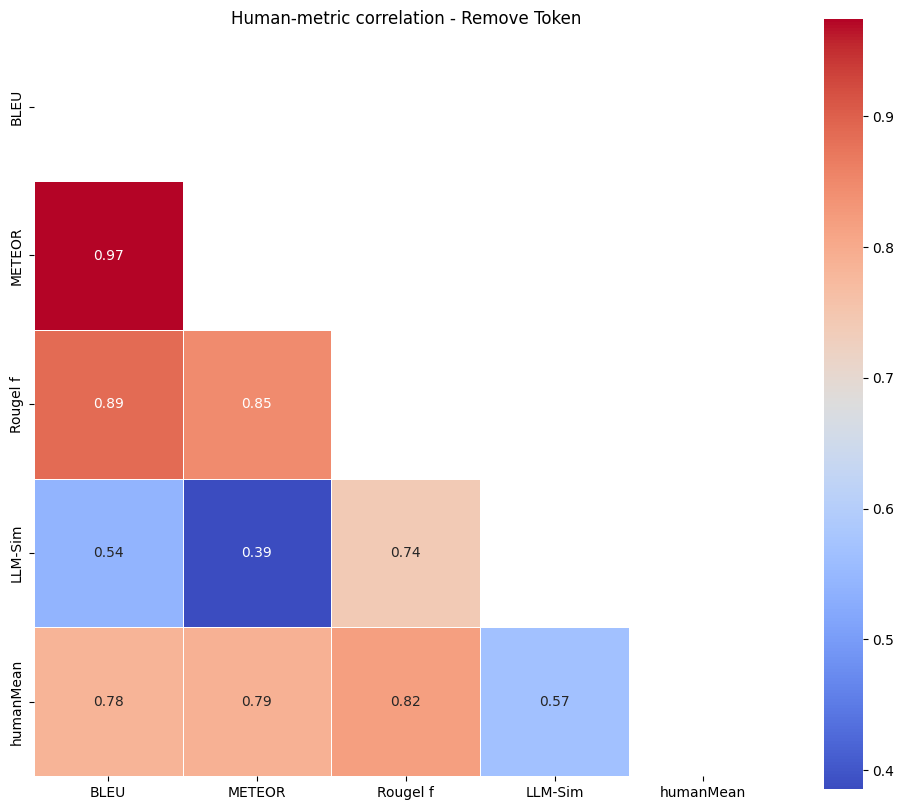

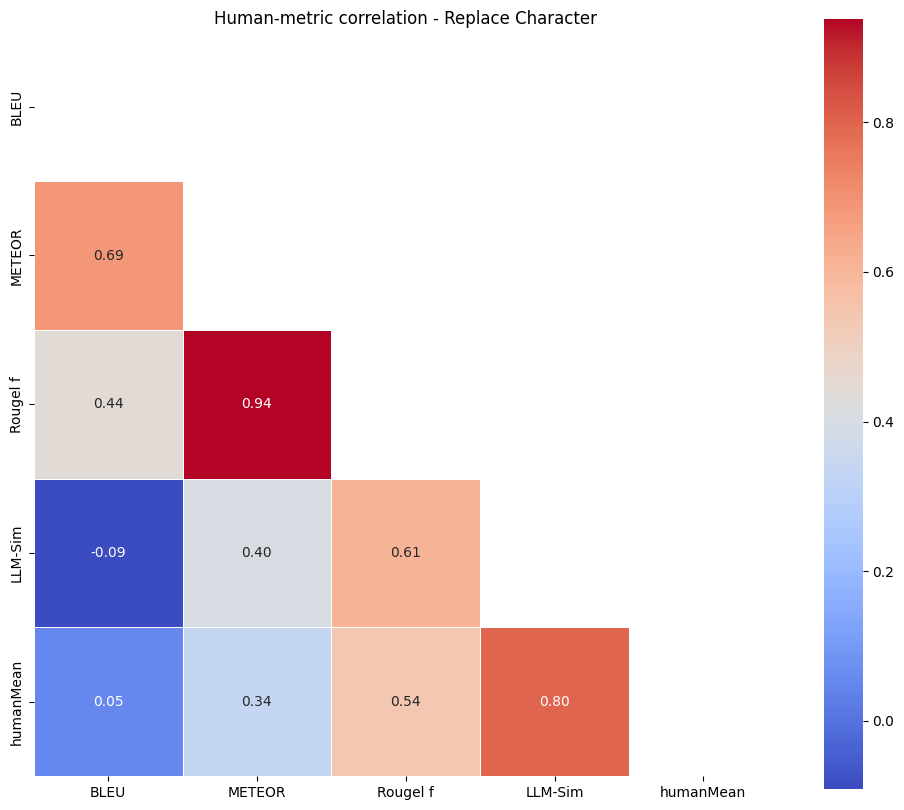

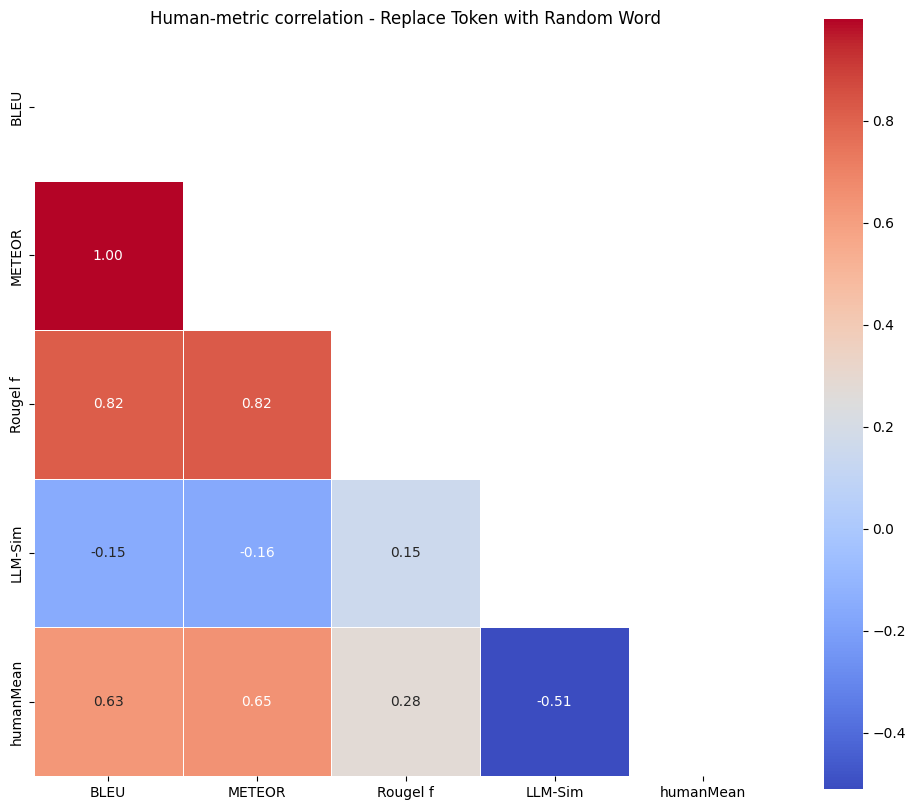

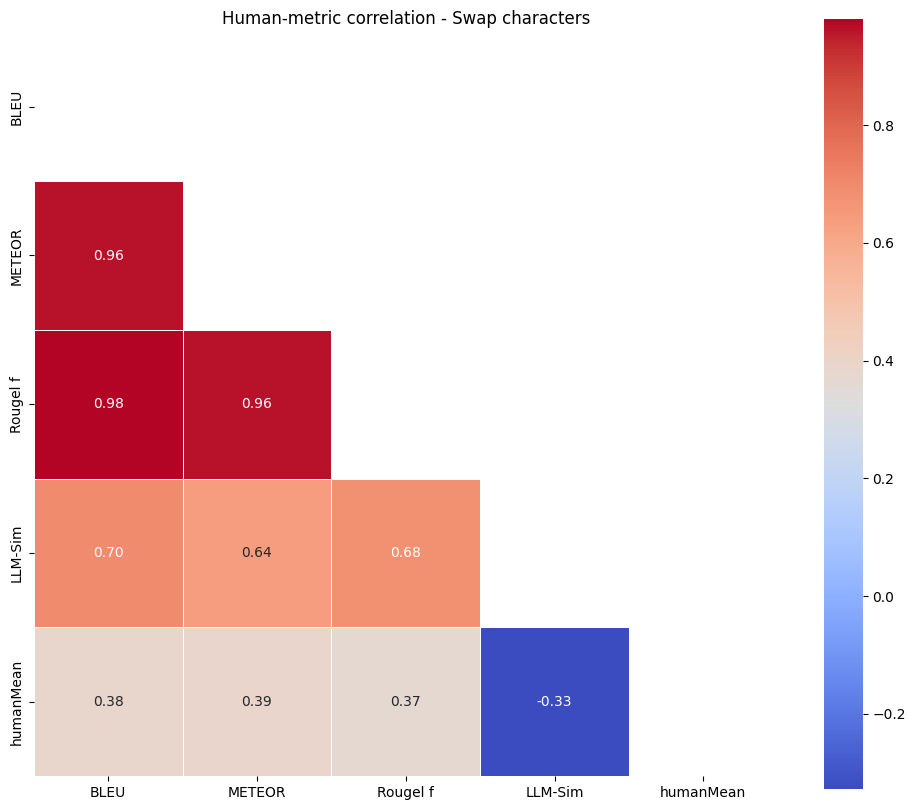

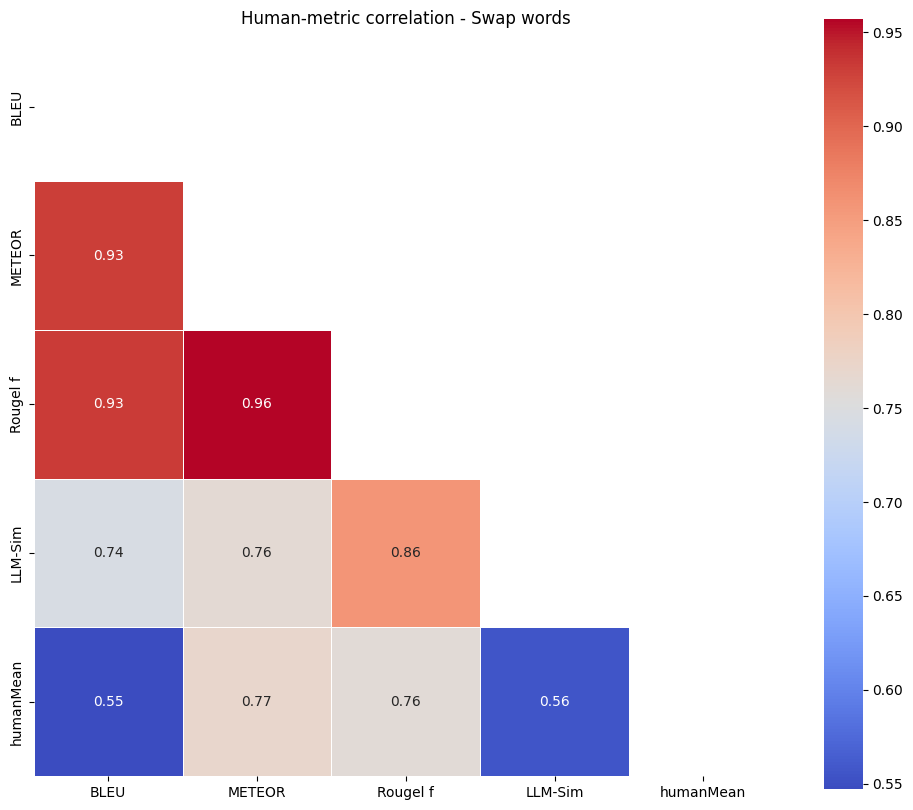

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("humanScores.csv")
dfMet = df[['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim', 'humanMean']]
corr = dfMet.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title("Human-metric correlation - All tampering strategies")
plt.show()

for x in df["tamperingType"].unique():
    data = df[df["tamperingType"]==x]
    dfMet = data[['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim', 'humanMean']]
    corr = dfMet.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

    plt.title(f"Human-metric correlation - {x}")
    plt.show()
    

In [41]:
import pandas as pd

df = pd.read_csv("humanScores.csv")

means = [df["humanMean"][i:i+10].mean() for i in range(0, 100, 10)]

# Print the result
for i, mean in enumerate(means, start=1):
    print(f"Bin {i}: Mean = {mean}")


Bin 1: Mean = 0.44633333333333336
Bin 2: Mean = 0.48133333333333334
Bin 3: Mean = 0.5826666666666667
Bin 4: Mean = 0.6253333333333333
Bin 5: Mean = 0.5536666666666666
Bin 6: Mean = 0.6686666666666666
Bin 7: Mean = 0.7683333333333333
Bin 8: Mean = 0.6656666666666666
Bin 9: Mean = 0.9323333333333335
Bin 10: Mean = 0.7473333333333333


In [42]:
import pandas as pd
import krippendorff

r1 = pd.read_csv('Nhu', header=None)
r2 = pd.read_csv('Oskar', header=None)
r3 = pd.read_csv('Christina', header=None)

humanData = pd.concat([r1, r2, r3], axis=1)
humanData.columns = ['rater1', 'rater2', 'rater3']

data = humanData.T.values
alpha = krippendorff.alpha(reliability_data=data, level_of_measurement='interval')

print("Krippendorff’s alpha:", alpha)


Krippendorff’s alpha: 0.2065559810188876


In [58]:
import pandas as pd

file_path = "combinedOutput_cleaned.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

std_devs = df.groupby('tamperingType')['LLM-Sim'].std()
print(std_devs)


tamperingType
Add random word                   0.048997
Duplicate Token                   0.018073
Duplicate character               0.009476
Negation                          0.233808
Remove Character                  0.014958
Remove Token                      0.039173
Replace Character                 0.020303
Replace Token with Random Word    0.095821
Swap characters                   0.013341
Swap words                        0.025643
Name: LLM-Sim, dtype: float64


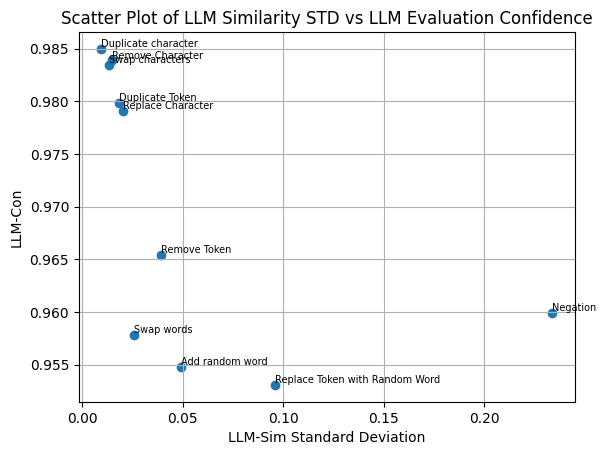

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

merged_df = pd.merge(std_devs, mean_global["LLM-Con"], on="tamperingType")

for i, row in merged_df.iterrows():
    plt.text(row["LLM-Sim"], row["LLM-Con"], str(i),
             fontsize=7, ha='left', va='bottom')

plt.scatter(merged_df['LLM-Sim'], merged_df['LLM-Con'])
plt.title('Scatter Plot of LLM Similarity STD vs LLM Evaluation Confidence')
plt.xlabel('LLM-Sim Standard Deviation')
plt.ylabel('LLM-Con')
plt.grid(True)
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('./output/combinedOutput_cleaned.csv')

count = df["originalSentence"].astype(str).str.contains(" ").sum()

print("Number of non-utf8 rows:", count)


Number of non-utf8 rows: 503
